In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

If you have multiple massSample and membership files, you need to combine them first via e.g.,
```
paste -d" " *.membership > cluster.membership
paste -d" " *.massSamples > cluster.massSamples
```

In [31]:
sm = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.massSamples"
mem = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.membership"
ph = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/NGC6819.phot"

In [42]:
phot = pd.read_csv(ph, sep="\s+")
phot['m1Mean'] = -1
phot['m1Std'] = -1
phot['m2Mean'] = -1
phot['m2Std'] = -1
phot['qMean'] = -1
phot['qStd'] = -1
phot['memMean'] = -1
phot['memStd'] = -1
phot['member'] = False
phot['binary'] = False
phot


,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,10639026771,20.4824,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1906,10095627116,20.5168,99.9000,99.9000,21.0998,99.9000,20.2313,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1907,10130227255,20.5313,99.9000,99.9000,99.9000,20.5410,20.3388,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1908,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [43]:
# should we exclude all the rows with negative sig values?
# no, we should probably include them since they are in the cluster
#
# phot = phot.loc[(phot['sigg_ps'] > 0) & (phot['sigr_ps'] > 0) & (phot['sigi_ps'] > 0) \
#                 & (phot['sigz_ps'] > 0) & (phot['sigy_ps'] > 0)]
# phot

In [44]:
# get the names for the masses
massesNames = np.loadtxt(sm,max_rows = 1, dtype=str)
massesNames = np.char.replace(massesNames,'mass','')
massesNames = np.char.replace(massesNames,'ratio','')
massesNames = np.char.replace(massesNames,'"','')
massesNames = (massesNames[massesNames != ''])
massesNames

array(['10010400015', '10010400015', '10618000016', ..., '10130227255',
       '10572927462', '10572927462'], dtype='<U11')

In [45]:
# get the masses
masses = np.loadtxt(sm,skiprows=1)
print(masses.shape)
print(masses.shape[1]/2.)

(9341, 3818)
1909.0


In [46]:
# get the memberships 
membership = np.loadtxt(mem)
print(membership.shape)

(9341, 1909)


In [47]:
phot

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,10639026771,20.4824,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1906,10095627116,20.5168,99.9000,99.9000,21.0998,99.9000,20.2313,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1907,10130227255,20.5313,99.9000,99.9000,99.9000,20.5410,20.3388,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False
1908,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-1,-1,-1,-1,-1,-1,-1,-1,False,False


In [50]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
for i in range(0,masses.shape[1],2):
    # get the row in the phot file
    iden = int(massesNames[i])
    row = phot.loc[(phot['id'] == iden)]
    #print(row['newID'])
    
    # get the column in the membership file
    imem = int(i/2)
    memArr = membership[:,imem]
    memMean = np.mean(memArr)
    memStd = np.std(memArr)
    
    # add to the phot df
    phot.at[row.index[0], 'memMean'] = memMean
    phot.at[row.index[0], 'memStd'] = memStd
    
    if (memMean - 3*memStd > 0):
        phot.at[row.index[0], 'member'] = True

        nCluster += 1
        
        # get the masses
        m1Arr = masses[:,i]
        qArr = masses[:,(i + 1)]
        m2Arr = m1Arr*qArr
        m2Mean = np.mean(m2Arr)
        m2Std = np.std(m2Arr)
        qMean = np.mean(qArr)
        qStd = np.std(qArr)
        
        # add to the phot df masses (to do)
        phot.at[row.index[0], 'qMean'] = qMean
        phot.at[row.index[0], 'qStd'] = qStd
    
        if (m2Mean - 3*m2Std > 0):
            nBinary += 1
            phot.at[row.index[0], 'binary'] = True

            
    #print(m1Arr)   
print(nBinary, nCluster, nBinary/nCluster, np.sqrt(nBinary)/nCluster)

471 1726 0.2728852838933951 0.01257389015887063


In [51]:
phot

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,m1Mean,m1Std,m2Mean,m2Std,qMean,qStd,memMean,memStd,member,binary
0,10010400015,9.9643,11.6368,8.7188,12.0640,11.9650,10.1610,9.0880,8.5260,6.758,...,-1,-1,-1,-1,0.040801,0.062545,1.000000,0.000000,True,False
1,10618000016,10.0908,11.4559,8.9425,13.2814,10.9032,9.0598,8.5864,8.8477,7.240,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
2,10719500017,10.1428,11.4292,9.0287,99.9000,99.9000,99.9000,99.9000,99.9000,7.356,...,-1,-1,-1,-1,0.033352,0.059547,0.999572,0.020689,True,False
3,11321600029,10.9064,11.7692,10.0000,99.9000,99.9000,99.9000,99.9000,99.9000,8.723,...,-1,-1,-1,-1,0.035140,0.084305,0.999786,0.014602,True,False
4,10007800034,11.0790,11.9665,10.1455,99.9000,99.9000,99.9000,99.9000,99.9000,8.819,...,-1,-1,-1,-1,0.104692,0.149630,1.000000,0.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,10639026771,20.4824,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
1906,10095627116,20.5168,99.9000,99.9000,21.0998,99.9000,20.2313,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
1907,10130227255,20.5313,99.9000,99.9000,99.9000,20.5410,20.3388,99.9000,99.9000,99.900,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False
1908,10572927462,20.5560,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,99.9000,16.851,...,-1,-1,-1,-1,-1.000000,-1.000000,0.000000,0.000000,False,False


(22.0, 13.0)

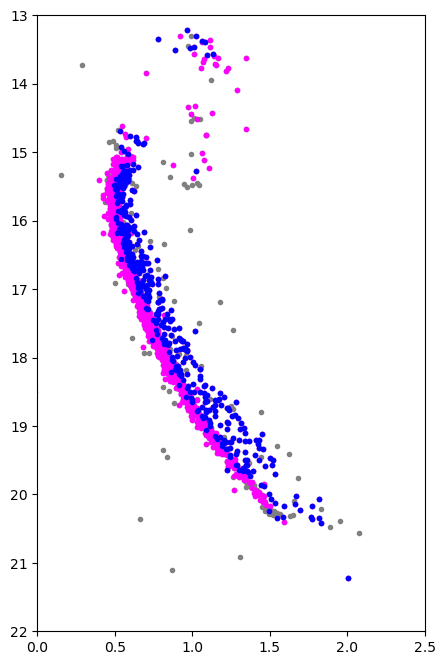

In [52]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 2.5)
ax.set_ylim(22, 13)

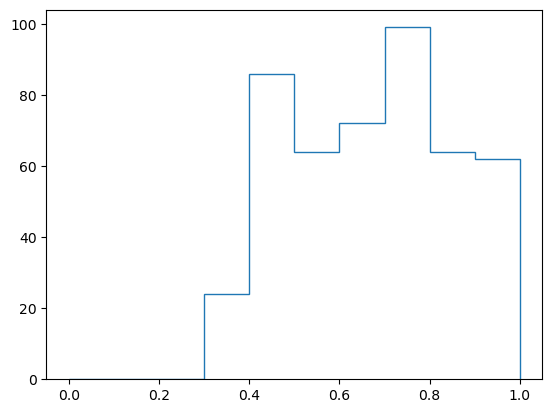

In [53]:
f, ax = plt.subplots()
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMean'], histtype='step', bins=10, range=[0,1])

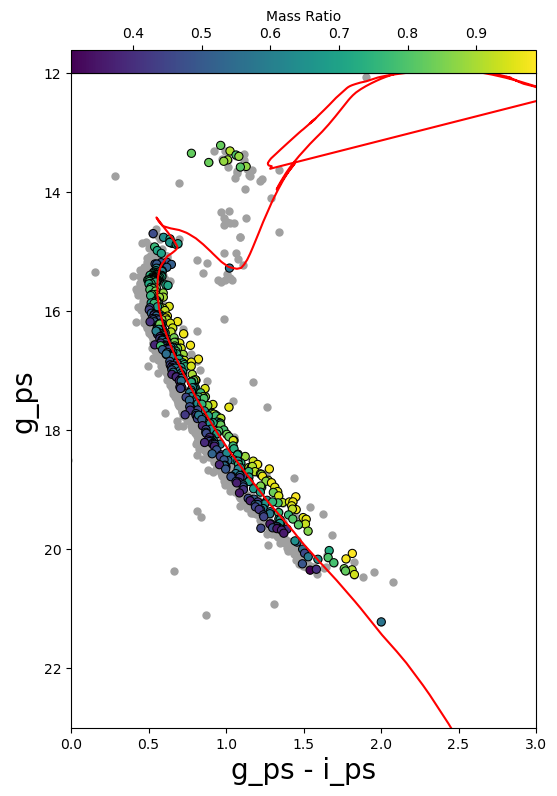

In [55]:
# from Erin Motherway
# plot CMD with a colorbar showing mass ratio

r = photBinary['qMean']
f, ax = plt.subplots(figsize=(6,10))
ax.set_xlabel('g_ps - i_ps',fontsize=20)
ax.set_ylabel('g_ps',fontsize=20)
#plot phot and cluster members
plt.scatter(phot['g_ps'] - phot['i_ps'], phot['g_ps'],s=25, color='#A0A0A0')
#plt.scatter(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],s=20, color='lightpink')
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)
#plot colorbar
plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75)
plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')

cmdfile=r"/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/NGC6819.ms"
mag = "g_ps"
color="g_ps-i_ps".split("-")

header=np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot = np.where(header == mag)[0][0]
color1 = np.where(header == color[0])[0][0]
color2 = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile, skiprows=1)
ymag = data[:,yplot]
color = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red')

#plt.savefig('smcmd.png')
plt.show()